#### Feed Forward Neural Network
The connection between nodes is only allowed from nodes in the layer $i$ to layer $i+1$. If output connections feed back into input then it is **recurrent neural network**.

#### The Perceptron Algorithm
- AND - The output is 1, if **both** inputs are 1.
- OR - The output is 1, if **either** of the input is 1.
- XOR - Th output is 1, if ***only one** of the input is 1.
<img src = "files\7.png">
AND and OR dataset are linearly seperable, but XOR is not.

#### Backpropagation [16, 76, 108, 57, 109]


[INFO] loading MNIST dataset...
[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/20
52500/52500 [==============================] - 5s 103us/step - loss: 2.2992 - acc: 0.1216 - val_loss: 2.2919 - val_acc: 0.1153
Epoch 2/20
52500/52500 [==============================] - 5s 90us/step - loss: 2.2870 - acc: 0.1282 - val_loss: 2.2805 - val_acc: 0.1169
Epoch 3/20
52500/52500 [==============================] - 5s 89us/step - loss: 2.2734 - acc: 0.1704 - val_loss: 2.2642 - val_acc: 0.2715
Epoch 4/20
52500/52500 [==============================] - 5s 98us/step - loss: 2.2527 - acc: 0.3111 - val_loss: 2.2378 - val_acc: 0.4859
Epoch 5/20
52500/52500 [==============================] - 5s 97us/step - loss: 2.2193 - acc: 0.4707 - val_loss: 2.1952 - val_acc: 0.5215
Epoch 6/20
52500/52500 [==============================] - 5s 98us/step - loss: 2.1672 - acc: 0.5493 - val_loss: 2.1315 - val_acc: 0.5707
Epoch 7/20
52500/52500 [==============================] - 5s 96us/st

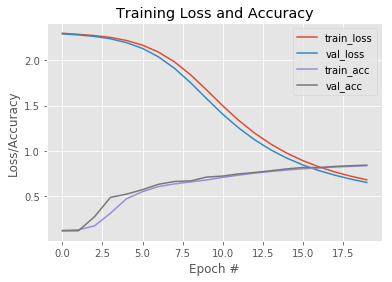

In [4]:
# importing the packages
from sklearn.preprocessing import LabelBinarizer # one-hot encode integer labels as vector labels
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential # our network will be feed forward and layer will be added sequentially on top of each other
from keras.layers.core import Dense # fully-connected layers
from keras.optimizers import SGD # SGD will optimize the parameter of our network
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
#import argparse

# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True, help="path to the output loss/accuracy plot")
args = {"output" : "\keras_mnist"}

# grab the mnist dataset
print("[INFO] loading MNIST dataset...")
dataset = datasets.fetch_openml('mnist_784')

# scale the pixel intensities between [0, 1.0]
# split the dataset
data  = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

# convert the labels from integers to vector
# each data point in MNIST has label [0, 9] 
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# define 784-256-128-10 architecture using keras
model = Sequential()
# input shape is set to 784(the dimensionality of each data points)
# we then learn 256 weight in this layer
model.add(Dense(256, input_shape=(784,), activation="sigmoid")) 
model.add(Dense(128, activation="sigmoid"))
# we are using softmax to obtain normalized class probabilities
model.add(Dense(10, activation="sigmoid"))

# train the model using SGD
print("[INFO] training network...")
# SGD optimizer with learning rate of 0.01
sgd = SGD(0.01)
# using cross-entropy loss function
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
# we are being lenient and using test data as validation data
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=128)

# evaluating the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
# argmax gives class with the largest probability
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_])) 

# plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig(args["output"])